<a href="https://colab.research.google.com/github/gc2321/3235-Machine-Learning/blob/main/XTRA_NEURO_NET_EXERCISES/2_cnn_classification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
random.seed(42)

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape
# each image is 28 x 28

(60000, 28, 28)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
y_train.shape

(60000,)

In [9]:
y_example = to_categorical(y_train)

In [10]:
y_example
# [1,0,0,...0], this is digit '0'

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [11]:
y_example.shape

(60000, 10)

In [12]:
y_cat_test = to_categorical(y_test,10)

In [13]:
y_cat_train = to_categorical(y_train,10)

## Process Data

In [14]:
# min = 0, max = 255, scale to values between 0, 1;
x_train = x_train/255
x_test = x_test/255

In [17]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [18]:
x_train = x_train.reshape(60000, 28, 28, 1)
# shape image to have one more channel for color

In [19]:
x_train.shape

(60000, 28, 28, 1)

In [20]:
x_test = x_test.reshape(10000,28,28,1)

## Training the Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [22]:
model = Sequential()

# CONVOLUTIONAL LAYER
## filter: large image, more filters, power of 2
## kernel_size:  2x2 or 4x4 or higher
## strides: 2D, typical 1x1 for smaller images, default
## padding: valid/same: valid: do not apply padding, same: automatically
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [26]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1439 - accuracy: 0.9563 - val_loss: 0.0650 - val_accuracy: 0.9775
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0486 - accuracy: 0.9848 - val_loss: 0.0430 - val_accuracy: 0.9863
Epoch 3/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0308 - accuracy: 0.9905 - val_loss: 0.0371 - val_accuracy: 0.9870
Epoch 4/10
1875/1875 [==============================] - 38s 21ms/step - loss: 0.0207 - accuracy: 0.9935 - val_loss: 0.0441 - val_accuracy: 0.9870
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0146 - accuracy: 0.9954 - val_loss: 0.0374 - val_accuracy: 0.9888


## Evaluate the Model

In [27]:
model.metrics_names

['loss', 'accuracy']

In [28]:
losses = pd.DataFrame(model.history.history)

In [29]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.143910,0.956300,0.065007,0.9775
1,0.048599,0.984767,0.043023,0.9863
2,0.030761,0.990467,0.037139,0.9870
3,0.020695,0.993517,0.044088,0.9870
4,0.014555,0.995417,0.037353,0.9888


<Axes: >

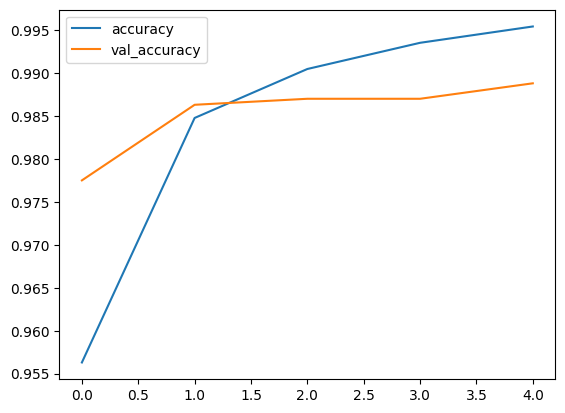

In [30]:
losses[['accuracy','val_accuracy']].plot()